<a href="https://colab.research.google.com/github/xixihaha1995/esp_proj3/blob/main/_0_Colaboratory_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

## Code cells
Below is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.


In [ ]:
a = 10
a

10

## Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see our [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$


## Adding and moving cells
You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar. 

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Ctrl while clicking another.  Similarly, using Shift instead of Ctrl will select all intermediate cells.

# Hardware accelerators
One floating number operation [Floating point numbers](https://youtu.be/PZRI1IfStY0?t=72) </br>
Find out more about the difference between CPU, GPU and TPU. [Tensor Processing Units](https://youtu.be/MXxN4fv01c8?t=239). </nr>

A 1 gigaFLOPS (GFLOPS) computer system is capable of performing one billion (109) floating-point operations per second. </br>
Generally speaking, </br>
CPU, Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz, 97.45 GFLOPS. </br>
GPU, GeForce GTX 1080 Ti, up to 355 GFLOPS. </br>
TPU, second-generation TPU by Google, 180,000 GFLOPs

## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

# Access to Google Drive

You can access files in Drive in a number of ways, including:
- Mounting your Google Drive in the runtime's virtual machine
- Using a wrapper around the API such as [PyDrive](https://pythonhosted.org/PyDrive/)
- Using the [native REST API](https://developers.google.com/drive/v3/web/about-sdk)



# We here will introduce the first approach.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Change directory to the following and print full pathname out:")
%cd '/content/drive/MyDrive/studying/Summer 2022/Project3/'

Mounted at /content/drive
Change directory to the following and print full pathname out
/content/drive/MyDrive/studying/Summer 2022/Project3


# Prefix commands with `!` or `%`

When working interactively with the standard Python interpreter, one of the frustrations is the need to switch between multiple windows to access Python tools and system command-line tools. IPython bridges this gap, and gives you a syntax for executing shell commands directly from within the IPython terminal. The magic happens with the exclamation point: anything appearing after ! on a line will be executed not by the Python kernel, but by the system command-line.

## Quick Introduction to the Shell

A full intro to using the shell/terminal/command-line is well beyond the scope of this chapter, but for the uninitiated we will offer a quick introduction here.
The shell is a way to interact textually with your computer.
Ever since the mid 1980s, when Microsoft and Apple introduced the first versions of their now ubiquitous graphical operating systems, most computer users have interacted with their operating system through familiar clicking of menus and drag-and-drop movements.
But operating systems existed long before these graphical user interfaces, and were primarily controlled through sequences of text input: at the prompt, the user would type a command, and the computer would do what the user told it to.
Those early prompt systems are the precursors of the shells and terminals that most active data scientists still use today.

Someone unfamiliar with the shell might ask why you would bother with this, when many results can be accomplished by simply clicking on icons and menus.
A shell user might reply with another question: why hunt icons and click menus when you can accomplish things much more easily by typing?
While it might sound like a typical tech preference impasse, when moving beyond basic tasks it quickly becomes clear that the shell offers much more control of advanced tasks, though admittedly the learning curve can intimidate the average computer user.

As an example, here is a sample of a Linux/OSX shell session where a user explores, creates, and modifies directories and files on their system (``osx:~ $`` is the prompt, and everything after the ``$`` sign is the typed command; text that is preceded by a ``#`` is meant just as description, rather than something you would actually type in):

```bash
osx:~ $ echo "hello world"             # echo is like Python's print function
hello world

osx:~ $ pwd                            # pwd = print working directory
/home/jake                             # this is the "path" that we're sitting in

osx:~ $ ls                             # ls = list working directory contents
notebooks  projects 

osx:~ $ cd projects/                   # cd = change directory

osx:projects $ pwd
/home/jake/projects

osx:projects $ ls
datasci_book   mpld3   myproject.txt

osx:projects $ mkdir myproject          # mkdir = make new directory

osx:projects $ cd myproject/

osx:myproject $ mv ../myproject.txt ./  # mv = move file. Here we're moving the
                                        # file myproject.txt from one directory
                                        # up (../) to the current directory (./)
osx:myproject $ ls
myproject.txt
```

Notice that all of this is just a compact way to do familiar operations (navigating a directory structure, creating a directory, moving a file, etc.) by typing commands rather than clicking icons and menus.
Note that with just a few commands (``pwd``, ``ls``, ``cd``, ``mkdir``, and ``cp``) you can do many of the most common file operations.
It's when you go beyond these basics that the shell approach becomes really powerful.

## Shell Commands in IPython

Any command that works at the command-line can be used in IPython by prefixing it with the ``!`` character. Note the result can be assigned to a variable:
For example, the ``ls``, ``pwd``, and ``echo`` commands can be run as follows:

```ipython
In [1]: !ls
myproject.txt

In [2]: !pwd
/home/jake/projects/myproject

In [3]: !echo "printing from the shell"
printing from the shell

In [4]: contents = !ls

In [5]: print(contents)
['myproject.txt']

In [6]: directory = !pwd

In [7]: print(directory)
['/Users/jakevdp/notebooks/tmp/myproject']
```

That `!ls` probably generated a large output. You can select the cell and clear the output by either: 

1. Clicking on the clear output button (x) in the toolbar above the cell; or
2. Right clicking the left gutter of the output area and selecting "Clear output" from the context menu.

In [ ]:
'''
!ls
!pwd
!echo "printing from the shell"
contents = !ls
print(contents)
directory = !pwd
print(directory)
'''
directory = !pwd
print(directory)

['/content']


If you play with IPython's shell commands for a while, you might notice that you cannot use ``!cd`` to navigate the filesystem:

```ipython
In [11]: !pwd
/home/jake/projects/myproject

In [12]: !cd ..

In [13]: !pwd
/home/jake/projects/myproject
```

The reason is that shell commands in the notebook are executed in a temporary subshell.
If you'd like to change the working directory in a more enduring way, you can use the ``%cd`` magic command:

```ipython
In [14]: %cd ..
/home/jake/projects
```

In [ ]:
'''
!pwd
!cd .. #change directory back one directory, then print the  full pathname of current working directory

!pwd
%cd ..
'''
!pwd

/


# Working with python
Colaboratory is built on top of [Jupyter Notebook](https://jupyter.org/). 

## install, import, and use python modules

Long running python processes can be interrupted. Run the following cell and select **Runtime -> Interrupt execution** (*hotkey: Cmd/Ctrl-M I*) to stop execution.

In [ ]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Pip is a package installer for python

https://pip.pypa.io/en/stable/

PIP is generally connect with Python 2 in Linux and Mac, whereas **pip3** is related to Python 3.

In [ ]:
!pip install numpy
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

## F-strings
Literal String Interpolation or more commonly as F-strings (because of the leading f character preceding the string literal). The idea behind f-strings is to make string interpolation simpler. 

In [ ]:
# Python3 program introducing f-string
val = 'Geeks'
print(f"{val}for{val} is a portal for {val}.")


name = 'Tushar'
age = 23
print(f"Hello, My name is {name} and I'm {age} years old.")


GeeksforGeeks is a portal for Geeks.
Hello, My name is Tushar and I'm 23 years old.


# Recycled cells

## Exception Formatting

Exceptions are formatted nicely in Colab outputs:

In [ ]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: ignored

## Automatic completions and exploring code

Colab provides automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the following cell to import the  [`numpy`](http://www.numpy.org) module.

In [ ]:
import numpy as np

If you now insert your cursor after `np` and press **Period**(`.`), you will see the list of available completions within the `np` module. Completions can be opened again by using **Ctrl+Space**.

In [ ]:
np

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
np.ndarray

The documentation can be opened again using **Ctrl+Shift+Space** or you can view the documentation for method by mouse **hovering over the method name**.

When hovering over the method name the `Open in tab` link will open the documentation in a persistent pane. The `View source` link will navigate to the source code for the method.

## Magics
Colaboratory shares the notion of magics from Jupyter. There are shorthand annotations that change how a cell's text is executed. To learn more, see [Jupyter's magics page](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb). 


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>

In [ ]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:red; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:blue; stroke:black; fill-opacity:0.5;" />
</svg>

## Commenting on a cell
You can comment on a Colaboratory notebook like you would on a Google Document. Comments are attached to cells, and are displayed next to the cell they refer to. If you have **comment-only** permissions, you will see a comment button on the top right of the cell when you hover over it.

If you have edit or comment permissions you can comment on a cell in one of three ways: 

1. Select a cell and click the comment button in the toolbar above the top-right corner of the cell.
1. Right click a text cell and select **Add a comment** from the context menu.
3. Use the shortcut **Ctrl+Shift+M** to add a comment to the currently selected cell. 

You can resolve and reply to comments, and you can target comments to specific collaborators by typing *+[email address]* (e.g., `+user@domain.com`). Addressed collaborators will be emailed. 

The Comment button in the top-right corner of the page shows all comments attached to the notebook.

## Uploading files from your local file system

`files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name and values are the data which were uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Downloading files to your local file system

`files.download` will invoke a browser download of the file to your local computer.

In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

## Colaboratory 
Colaboratory is integrated with Google Drive. It allows you to share, comment, and collaborate on the same document with multiple people:

* The **SHARE** button (top-right of the toolbar) allows you to share the notebook and control permissions set on it.

* **File->Make a Copy** creates a copy of the notebook in Drive.

* **File->Save** saves the File to Drive. **File->Save and checkpoint** pins the version so it doesn't get deleted from the revision history. 

* **File->Revision history** shows the notebook's revision history. 

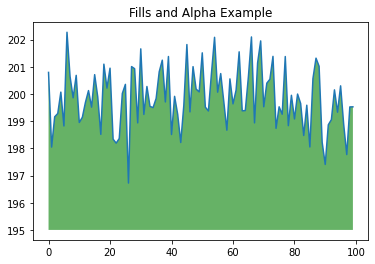

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()